## # Generate Figure 2
Figure 2 : A. Population activity, for multiple simulations, reduced in PCA space, for different trials of the same synaptic reconfiguration (learning conditions). Population exhibits stereotypical trajectories that are stable despite intrinsic and stimulus noise. B. Population activity reduced in two principal components (PCAL2) over time for three different synaptic reconfigurations. Only delay period is plotted. Time is in seconds. C. Boxplot of number of clusters after k-means for n=2 structured network instances and for n=10 synaptic reshufflings, for n=50 stimulated trials.

Import necessary modules:

In [1]:
import notebook_module as nb
import analysis_tools as analysis
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from functools import partial
from pathlib import Path


Create figure 3C. 

<IPython.core.display.Javascript object>


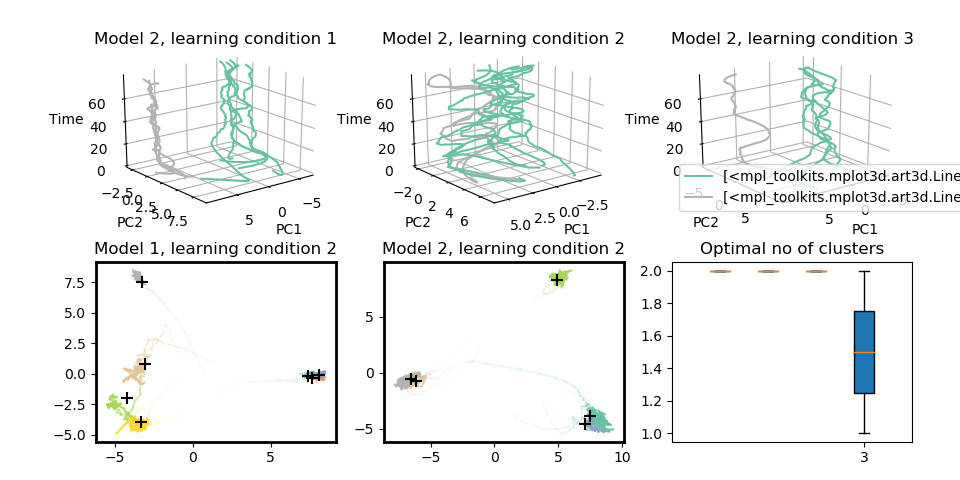

	k=1, so skipping test for overfit.
	k=1, so skipping test for overfit.


c:\users\stefanos\anaconda3\envs\publication\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
c:\users\stefanos\anaconda3\envs\publication\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


	k=1, so skipping test for overfit.


c:\users\stefanos\anaconda3\envs\publication\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Cannot run kmeans with greater k than the data_pcapoints!
	k=1, so skipping test for overfit.


c:\users\stefanos\anaconda3\envs\publication\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Cannot run kmeans with greater k than the data_pcapoints!
	k=1, so skipping test for overfit.


c:\users\stefanos\anaconda3\envs\publication\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


	k=1, so skipping test for overfit.
	k=1, so skipping test for overfit.
	k=1, so skipping test for overfit.
	k=1, so skipping test for overfit.
	k=1, so skipping test for overfit.
	k=1, so skipping test for overfit.
	k=1, so skipping test for overfit.
	k=1, so skipping test for overfit.
	k=1, so skipping test for overfit.


In [2]:
# Do only figures that will probably not change much.
simulations_dir = Path.cwd().joinpath('simulations')
plt.rcParams.update({'font.family': 'Helvetica'})
#===============================================================================
#===============================================================================
# FIGURE 1 (PENDING)
#===============================================================================
#===============================================================================
# FIGURE 2
subplot_width = 3
subplot_height = 2
plt.ion()
%matplotlib notebook
figure2 = plt.figure(figsize=plt.figaspect(0.5))
figure2_axis = np.zeros((subplot_height, subplot_width), dtype=object)
for idx in range(subplot_width):
    figure2_axis[0, idx] = figure2.add_subplot(
        subplot_height, subplot_width, idx + 1, projection='3d'
    )

y_array = np.linspace(0.1, 100, 1000)
y_i = 500
no_of_conditions = 2#10

# Plot same animal model, different learning conditions:
conditions = [1, 2, 3]
for idx, learning_condition in enumerate(conditions):
    NWBfile = analysis.load_nwb_file(
        animal_model=2,
        learning_condition=learning_condition,
        experiment_config='structured',
        type='bn',
        data_path=simulations_dir
    )

    trial_len = analysis.get_acquisition_parameters(
        input_NWBfile=NWBfile,
        requested_parameters=['trial_len']
    )
    custom_range = (20, int(trial_len / 50))

    K_star, K_labels = analysis.determine_number_of_clusters(
        NWBfile_array=[NWBfile],
        max_clusters=no_of_conditions,
        y_array=y_array,
        custom_range=custom_range
    )

    # Plot the annotated clustering results:
    analysis.pcaL2(
        NWBfile_array=[NWBfile],
        klabels=K_labels[y_i, :].T,
        custom_range=custom_range,
        smooth=True, plot_3d=True,
        plot_axes=figure2_axis[0, idx]
    )


# Plot whole animal model state space:
for idx, animal_model in enumerate([1,2]):
    figure2_axis[1, idx] = figure2.add_subplot(
        subplot_height, subplot_width, 4 + idx
    )
    NWBfiles = [
        analysis.load_nwb_file(
            animal_model=animal_model,
            learning_condition=learning_condition,
            experiment_config='structured',
            type='bn',
            data_path=simulations_dir
        )
        for learning_condition in range(1, no_of_conditions + 1)
    ]

    trial_len, ntrials = analysis.get_acquisition_parameters(
        input_NWBfile=NWBfiles[0],
        requested_parameters=['trial_len', 'ntrials']
    )
    custom_range = (20, int(trial_len / 50))

    K_star, K_labels = analysis.determine_number_of_clusters(
        NWBfile_array=NWBfiles,
        max_clusters=no_of_conditions * ntrials,
        y_array=y_array,
        custom_range=custom_range
    )

    # Plot the annotated clustering results:
    analysis.pcaL2(
        NWBfile_array=NWBfiles,
        klabels=K_labels[y_i, :].T,
        custom_range=custom_range,
        smooth=True, plot_2d=True,
        plot_axes=figure2_axis[1, idx]
    )


# TODO: Plot number of clusters per animal/condition (na dw)
# Run for every learning condition and animal the k-means clustering:
figure2_axis[1, 2] = figure2.add_subplot(
    subplot_height, subplot_width, 6
)
no_of_animals = 4
optimal_clusters_of_group = defaultdict(partial(np.ndarray, 0))
for animal_model in range(1, no_of_animals + 1):
    # Pool together no of clusters for one animal model:
    K_star_over_trials = np.zeros((no_of_conditions, 1))
    for learning_condition in range(1, no_of_conditions + 1):
        # Lazy load the data as a NWB file. Easy to pass around and
        # encapsulates info like trial length, stim times etc.
        #TODO: this might raised some exceptions. Investigate!
        nwbfile = analysis.load_nwb_file(
            animal_model=animal_model,
            learning_condition=learning_condition,
            experiment_config='structured',
            type='bn',
            data_path=simulations_dir
        )

        trial_len = analysis.get_acquisition_parameters(
            input_NWBfile=nwbfile,
            requested_parameters=['trial_len']
        )

        # TODO: Where is custom range needed? determine a global way
        # of passing it around...
        custom_range = (20, int(trial_len / 50))

        K_star, K_labels = analysis.determine_number_of_clusters(
            NWBfile_array=[nwbfile],
            max_clusters=no_of_conditions,
            y_array=y_array,
            custom_range=custom_range
        )

        K_star_over_trials[learning_condition - 1, :] = \
            K_star[y_i]

    optimal_clusters_of_group[nb.datasetName(animal_model)] = \
        K_star_over_trials



figure2_axis[1, 2].set_title('Optimal no of clusters')
bplots = []
for pos, animal in enumerate(range(1, no_of_animals + 1)):
    bp = figure2_axis[1, 2].boxplot(
        optimal_clusters_of_group[nb.datasetName(animal)],
        positions=[pos],
        widths=0.4,
        patch_artist=True
    )
figure2_axis[1, 2].set_xlim(-1, 4)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.20)

plt.show()


In [4]:
figure2.savefig('Figure_2.svg')
print('Tutto pronto!')

Tutto pronto!
